<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/tutorials/3-Practical/FinRL_PaperTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from finrl.train import train
from finrl.test import test
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from common import *

import numpy as np
import pandas as pd

/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '1Min'  # '1Min'

env = StockTradingEnv

start_date = '2022-6-1'
end_date = '2022-6-10'

In [3]:
account_value = test(start_date = start_date, 
      end_date = end_date,
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= candle_time_interval, 
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      API_BASE_URL = API_BASE_URL,
#       erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      if_plot=True, # to return a dataframe for backtest_plot
      break_step=1e7)

Alpaca successfully connected
Load data from data/alpaca_2022-6-1_2022-6-10.pkl
The data looks like: 
                    timestamp     open      high      low     close     volume  \
0  2022-06-01 09:30:00-04:00  149.910  150.4000  149.880  150.1200  1368498.0   
1  2022-06-01 09:30:00-04:00  257.880  257.9700  255.510  256.7200    75245.0   
2  2022-06-01 09:30:00-04:00  169.680  169.6800  168.700  169.1100    49897.0   
3  2022-06-01 09:30:00-04:00  133.200  133.8800  132.330  133.6300   145791.0   
4  2022-06-01 09:30:00-04:00  218.460  218.4600  217.000  217.4900    48460.0   
5  2022-06-01 09:30:00-04:00  178.700  179.5100  178.010  179.1500   709696.0   
6  2022-06-01 09:30:00-04:00   45.540   45.5800   45.390   45.5400   564031.0   
7  2022-06-01 09:30:00-04:00  176.720  177.0800  176.660  176.9700     9277.0   
8  2022-06-01 09:30:00-04:00  112.080  112.1400  111.460  111.6300    15076.0   
9  2022-06-01 09:30:00-04:00   68.650   68.8590   68.570   68.6100   164577.0   
10 202

/home/quantumiracle/research/FinRL/finrl/agents/elegantrl/models.py:110: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 0.9721509111091615


In [4]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = start_date,
        end = end_date)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7, 8)
Annual return          -0.450016
Cumulative returns     -0.016470
Annual volatility       0.194219
Sharpe ratio           -3.505238
Calmar ratio          -15.338149
Stability               0.504897
Max drawdown           -0.029340
Omega ratio             0.573306
Sortino ratio          -4.472338
Skew                         NaN
Kurtosis                     NaN
Tail ratio              0.696369
Daily value at risk    -0.027171
dtype: float64


==============Compare to DJIA===========
date 7
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7, 8)


Start date,2022-06-01
End date,2022-06-09
Total months,0
,Backtest
Annual return,-41.964%
Cumulative returns,-1.5%
Annual volatility,28.159%
Sharpe ratio,-2.13
Calmar ratio,-12.68
Stability,0.26
Max drawdown,-3.31%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.31,2022-06-02,2022-06-09,NaT,NaN
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/home/quantumiracle/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


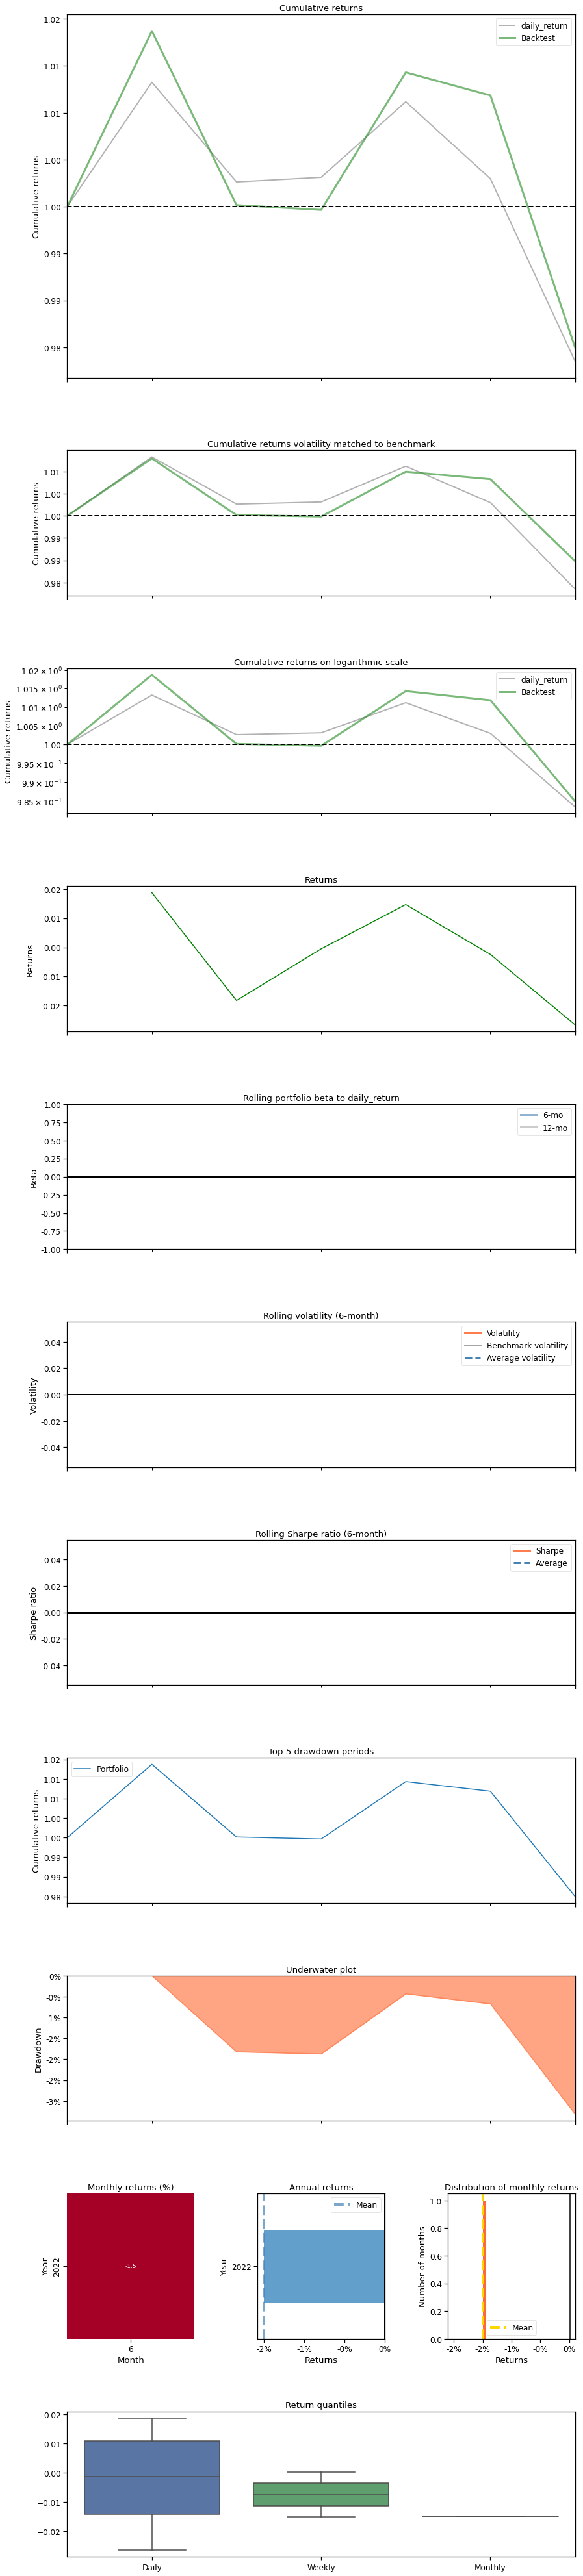

In [5]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = start_date,
             baseline_end = end_date)